In [5]:
import os
import sys
import urllib, io

import numpy as np
import scipy.stats as stats
import pandas as pd

import pymongo as pm
from collections import Counter
import json
import re
import ast

from PIL import Image, ImageOps, ImageDraw, ImageFont 

from io import BytesIO
import base64

import  matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')

from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

### setup paths

In [6]:
## directory & file hierarchy
proj_dir = os.path.abspath('..')
datavol_dir = os.path.join(proj_dir,'data')
analysis_dir = os.path.abspath(os.path.join(os.getcwd(),'..'))
results_dir = os.path.join(proj_dir,'results')
plot_dir = os.path.join(results_dir,'plots')
csv_dir = os.path.join(results_dir,'csv')
json_dir = os.path.join(results_dir,'json')
exp_dir = os.path.abspath(os.path.join(proj_dir,'experiments'))
png_dir = os.path.abspath(os.path.join(datavol_dir,'png'))
will_dir = os.getcwd()

## add helpers to python path
if os.path.join(proj_dir,'stimuli') not in sys.path:
    sys.path.append(os.path.join(proj_dir,'stimuli'))
    
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)   
    
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)       
    
import blockworld_helpers as utils    
    
# ## Assign variables within imported analysis helpers
# import analysis_helpers as h
# if sys.version_info[0]>=3:
#     from importlib import reload
# reload(h)

ModuleNotFoundError: No module named 'blockworld_helpers'

### connect to db [skip this if on compute server that is behind vpn]

#### remember to establish tunnel to cogtoolslab server first: `ssh -fNL 27017:127.0.0.1:27017 USER@cogtoolslab.org`

In [7]:
## set vars 
auth = pd.read_csv(os.path.join(analysis_dir,'auth.txt'), header = None) # this auth.txt file contains the password for the sketchloop user
pswd = auth.values[0][0]
user = 'sketchloop'
host = 'cogtoolslab.org' ## cocolab ip address

## have to fix this to be able to analyze from local
import pymongo as pm
conn = pm.MongoClient('mongodb://sketchloop:' + pswd + '@127.0.0.1')
db = conn['block_construction']
coll = db['silhouette']

## which iteration name should we use?
iterationName = 'testing'

In [11]:
coll.distinct('iterationName')

['testing',
 'dataTesting',
 'pilot0',
 'debug',
 'pilot1',
 'testpilot2',
 'pilot2',
 'pilot3']

### query over mongodb records and organize into tidy dataframe

In [ ]:
## define how we will initially query records in the database
query = coll.find({'blockVertices':{'$exists':True},'iterationName':iterationName })

In [ ]:
## convert into pandas dataframe
df = pd.DataFrame(list(query.sort('time_absolute')))

In [5]:
query = coll.find({'randID':'v31lrjcfgdbtbrqb5utri'})
df = pd.DataFrame(list(query.sort('time_absolute')))
df['trialList']

,F1Score,_id,aID,allBlockBodyProperties,allBlockDims,allVertices,blockBodyProperties,blockCenterX,blockCenterY,blockDimUnits,...,timeAbsolute,timeRelative,trialList,trialNum,version,vertices,workerId,worldHeightUnits,worldScale,worldWidthUnits
0,0.000000,5dd83ed0b86c3e2f72298088,,[],"[[1, 2], [2, 1], [2, 2], [2, 4], [4, 2]]",NaN,NaN,NaN,NaN,NaN,...,1.574453e+12,2601.845,"[{'condition': 'mental', 'targetBlocks': [{'wi...",0,71,"[{'x': -247.50000000000017, 'y': 702.428571428...",,8,2.2,8
1,0.000000,5dd83ed2b86c3e2f72298089,,NaN,"[[1, 2], [2, 1], [2, 2], [2, 4], [4, 2]]",NaN,"{'id': 11, 'type': 'body', 'label': 'Rectangle...",607.200000,642.803906,"[2, 2]",...,1.574453e+12,4534.340,"[{'condition': 'mental', 'targetBlocks': [{'wi...",0,71,"[{'x': -247.50000000000017, 'y': 702.428571428...",,8,2.2,8
2,0.000000,5dd83ed4b86c3e2f7229808a,,"[{'id': 11, 'angle': 0, 'position': {'x': 607....","[[1, 2], [2, 1], [2, 2], [2, 4], [4, 2]]","[[{'x': 552.2, 'y': 592.478571428572}, {'x': 6...","{'id': 11, 'type': 'body', 'label': 'Rectangle...",607.200000,647.478571,"[2, 2]",...,1.574453e+12,6520.060,"[{'condition': 'mental', 'targetBlocks': [{'wi...",0,71,"[{'x': -247.50000000000017, 'y': 702.428571428...",,8,2.2,8
3,0.000000,5dd83ed4b86c3e2f7229808b,,NaN,"[[1, 2], [2, 1], [2, 2], [2, 4], [4, 2]]",NaN,"{'id': 13, 'type': 'body', 'label': 'Rectangle...",609.400000,532.803906,"[4, 2]",...,1.574453e+12,6576.580,"[{'condition': 'mental', 'targetBlocks': [{'wi...",0,71,"[{'x': -247.50000000000017, 'y': 702.428571428...",,8,2.2,8
4,0.000000,5dd83ed6b86c3e2f7229808c,,"[{'id': 11, 'angle': 2.127474852265551e-05, 'p...","[[1, 2], [2, 1], [2, 2], [2, 4], [4, 2]]","[[{'x': 552.201224457822, 'y': 592.49447588646...","{'id': 13, 'type': 'body', 'label': 'Rectangle...",609.406698,537.543501,"[4, 2]",...,1.574453e+12,8029.995,"[{'condition': 'mental', 'targetBlocks': [{'wi...",0,71,"[{'x': -247.50000000000017, 'y': 702.428571428...",,8,2.2,8
5,0.000000,5dd83ed6b86c3e2f7229808d,,NaN,"[[1, 2], [2, 1], [2, 2], [2, 4], [4, 2]]",NaN,"{'id': 15, 'type': 'body', 'label': 'Rectangle...",607.200000,365.603906,"[2, 4]",...,1.574453e+12,8067.820,"[{'condition': 'mental', 'targetBlocks': [{'wi...",0,71,"[{'x': -247.50000000000017, 'y': 702.428571428...",,8,2.2,8
6,0.000000,5dd83ed7b86c3e2f7229808e,,"[{'id': 11, 'angle': 2.791333337018593e-05, 'p...","[[1, 2], [2, 1], [2, 2], [2, 4], [4, 2]]","[[{'x': 552.200307946449, 'y': 592.59006998437...","{'id': 15, 'type': 'body', 'label': 'Rectangle...",607.203334,372.870573,"[2, 4]",...,1.574453e+12,9756.860,"[{'condition': 'mental', 'targetBlocks': [{'wi...",0,71,"[{'x': -247.50000000000017, 'y': 702.428571428...",,8,2.2,8
7,0.000000,5dd83ed7b86c3e2f7229808f,,NaN,"[[1, 2], [2, 1], [2, 2], [2, 4], [4, 2]]",NaN,"{'id': 17, 'type': 'body', 'label': 'Rectangle...",695.200000,420.603906,"[1, 2]",...,1.574453e+12,9803.480,"[{'condition': 'mental', 'targetBlocks': [{'wi...",0,71,"[{'x': -247.50000000000017, 'y': 702.428571428...",,8,2.2,8
8,0.000000,5dd83edab86c3e2f72298090,,"[{'id': 11, 'angle': 0.0004444336926624738, 'p...","[[1, 2], [2, 1], [2, 2], [2, 4], [4, 2]]","[[{'x': 552.2136092612413, 'y': 592.6478370015...","{'id': 17, 'type': 'body', 'label': 'Rectangle...",695.440727,428.204643,"[1, 2]",...,1.574453e+12,12049.375,"[{'condition': 'mental', 'targetBlocks': [{'wi...",0,71,"[{'x': -247.50000000000017, 'y': 702.428571428...",,8,2.2,8
9,0.000000,5dd83edab86c3e2f72298091,,NaN,"[[1, 2], [2, 1], [2, 2], [2, 4], [4, 2]]",NaN,"{'id': 19, 'type': 'body', 'label': 'Rectangle...",695.200000,317.203906,"[1, 2]",...,1.574453e+12,12107.925,"[{'condition': 'mental', 'targetBlocks': [{'wi...",0,71,"[{'x': -247.50000000000017, 'y': 702.428571428...",,8,2.2,8


### Show some reduced dataframes

Check if all data events are recorded

In [16]:
# get whole sequence of data for one person
query = coll.find({'randID':"v1mpsbnlolhzyo9un4s4t"})
df = pd.DataFrame(list(query.sort('time_absolute')))
df[['normedIncrementalScore','trialNum','condition','phase','eventType','score', 'points','iterationName','numBlocksExplore','buildTime','relativePlacementTime','numBlocks','blockNum']]

,normedIncrementalScore,trialNum,condition,phase,eventType,score,points,iterationName,numBlocksExplore,buildTime,relativePlacementTime,numBlocks,blockNum
0,0.476248,NaN,practice,practice,initial,0,0,testpilot3,NaN,NaN,1938.0,NaN,1.0
1,0.598164,NaN,practice,practice,settled,0,0,testpilot3,NaN,NaN,1938.0,1.0,NaN
2,0.598164,NaN,practice,practice,initial,0,0,testpilot3,NaN,NaN,4889.0,NaN,2.0
3,0.678241,NaN,practice,practice,settled,0,0,testpilot3,NaN,NaN,4889.0,2.0,NaN
4,0.678241,NaN,practice,practice,initial,0,0,testpilot3,NaN,NaN,6908.0,NaN,3.0
5,0.848881,NaN,practice,practice,settled,0,0,testpilot3,NaN,NaN,6908.0,3.0,NaN
6,0.848881,NaN,practice,practice,initial,0,0,testpilot3,NaN,NaN,9142.0,NaN,4.0
7,0.963235,NaN,practice,practice,settled,0,0,testpilot3,NaN,NaN,9142.0,4.0,NaN
8,0.978551,NaN,practice,practice,initial,0,0,testpilot3,NaN,NaN,10942.0,NaN,5.0
9,0.993512,NaN,practice,practice,settled,0,0,testpilot3,NaN,NaN,10942.0,5.0,NaN


In [19]:
# get whole sequence of data for one iteration
query = coll.find({'iterationName':"pilot4"})
df = pd.DataFrame(list(query.sort('time_absolute')))
df[['normedIncrementalScore','trialNum','condition','phase','eventType',
    'score', 'points','iterationName','numBlocksExplore','buildTime',
    'relativePlacementTime','numBlocks','blockNum','success']]

,normedIncrementalScore,trialNum,condition,phase,eventType,score,points,iterationName,numBlocksExplore,buildTime,relativePlacementTime,numBlocks,blockNum,success
0,0.223904,NaN,practice,practice,initial,0.00,0,pilot4,NaN,NaN,13318.0,NaN,1.0,NaN
1,0.472679,NaN,practice,practice,initial,0.00,0,pilot4,NaN,NaN,6587.0,NaN,1.0,NaN
2,0.326386,NaN,practice,practice,settled,0.00,0,pilot4,NaN,NaN,13318.0,1.0,NaN,NaN
3,0.326386,NaN,practice,practice,initial,0.00,0,pilot4,NaN,NaN,17807.0,NaN,2.0,NaN
4,0.488065,NaN,practice,practice,initial,0.00,0,pilot4,NaN,NaN,11006.0,NaN,1.0,NaN
5,0.555453,NaN,practice,practice,settled,0.00,0,pilot4,NaN,NaN,6587.0,1.0,NaN,NaN
6,0.555453,NaN,practice,practice,initial,0.00,0,pilot4,NaN,NaN,11545.0,NaN,2.0,NaN
7,0.398251,NaN,practice,practice,settled,0.00,0,pilot4,NaN,NaN,17807.0,2.0,NaN,NaN
8,0.398251,NaN,practice,practice,initial,0.00,0,pilot4,NaN,NaN,21141.0,NaN,3.0,NaN
9,0.613820,NaN,practice,practice,settled,0.00,0,pilot4,NaN,NaN,11545.0,2.0,NaN,NaN


In [22]:
# get whole sequence of data for one person
query = coll.find({"$and":[
                        {'workerId':{'$exists':True}},
                        {'iterationName':"pilot4"},
                        {'eventType':'trial_end'},
                        {'trialNum':15}]})
df = pd.DataFrame(list(query.sort('workerId')))
df[['workerId','trialNum','condition','phase','eventType','score', 'points','iterationName','numBlocks','normedScore']]

,workerId,trialNum,condition,phase,eventType,score,points,iterationName,numBlocks,normedScore
0,A12OZ7P7Z41SJI,15,mental,build,trial_end,0.05,958,pilot4,11,0.676503
1,A147F5PJTHOB8A,15,mental,build,trial_end,0.11,1130,pilot4,11,0.800126
2,A191V7PT3DQKDP,15,mental,build,trial_end,0.54,1418,pilot4,7,0.734724
3,A198MSVO1VTAT5,15,mental,build,trial_end,0.31,1290,pilot4,9,0.808247
4,A1F4N58CAX8IMK,15,physical,build,trial_end,0.35,1260,pilot4,11,0.817520
5,A1PAPIJ1ZCEQBD,15,physical,build,trial_end,0.00,8,pilot4,0,0.000000
6,A1TLNLB9D87H6,15,physical,build,trial_end,0.17,1106,pilot4,10,0.637477
7,A1TZCSZA0IQ6JB,15,mental,build,trial_end,0.01,583,pilot4,3,0.388223
8,A1WH32GYQOHIRQ,15,mental,build,trial_end,0.00,754,pilot4,4,0.373267
9,A1ZB2NY0F9QNP0,15,physical,build,trial_end,0.42,1343,pilot4,7,0.382356


In [123]:
query = coll.find({"workerId":"A1RFS3YXD1ZIKG"})
df = pd.DataFrame(list(query.sort('time_absolute')))
#df[['workerId','trialNum','condition','phase','eventType','score', 'points','iterationName','normedIncrementalScore']]
list(df['score'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04]

In [54]:
# get whole sequence of data for one person
query = coll.find({'randID':"l6krowoij8h48cr5dydt7e"})
df = pd.DataFrame(list(query.sort('time_absolute')))


In [9]:
# get whole sequence of data for one person
query = coll.find({"$and":[
                        {'randID':"v31lrjcfgdbtbrqb5utri"},
                        {'eventType':{"$ne":'settled'}},
                        {'eventType':{"$ne":'initial'}}]
                     })
df = pd.DataFrame(list(query.sort('time_absolute')))
df[['trialNum','phase','condition','eventType','score','normedScore']]

,trialNum,phase,condition,eventType,score,normedScore
0,0,explore,mental,explore_end,0.00,0.000000
1,0,build,mental,trial_end,0.05,0.962209
2,1,explore,mental,explore_end,0.00,0.000000
3,1,build,mental,trial_end,0.10,0.930488
4,2,explore,physical,explore_end,0.00,0.000000
5,2,build,physical,trial_end,0.15,0.970804
6,3,explore,physical,explore_end,0.00,0.000000
7,3,build,physical,reset,0.00,0.000000
8,3,build,physical,trial_end,0.20,0.936793
9,4,explore,mental,explore_end,0.00,0.000000


### Basic analyses: accuracy and nblocks

In [151]:
# get sequence of trial_end data for all people
# note that these currently lump everyone together, and don't
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'iterationName':'pilot1'}]
                     })
df_full = pd.DataFrame(list(query.sort('workerId')))
df = df_full[['workerId','trialNum','phase','condition','eventType','score','normedScore','numBlocks']]
df

,workerId,trialNum,phase,condition,eventType,score,normedScore,numBlocks
0,A1RFS3YXD1ZIKG,0,build,physical,trial_end,0.00,0.000000,0
1,A1RFS3YXD1ZIKG,0,build,mental,trial_end,0.00,0.000000,0
2,A1RFS3YXD1ZIKG,0,build,physical,trial_end,0.00,0.000000,0
3,A2AM62BHO8G9MB,0,build,mental,trial_end,0.01,0.748504,5
4,A2AM62BHO8G9MB,1,build,physical,trial_end,0.04,0.913127,6
5,A2AM62BHO8G9MB,2,build,mental,trial_end,0.09,0.943046,7
6,A2AM62BHO8G9MB,3,build,physical,trial_end,0.10,0.756074,9
7,A2AM62BHO8G9MB,4,build,mental,trial_end,0.11,0.727362,9
8,A2AM62BHO8G9MB,5,build,physical,trial_end,0.14,0.904940,8
9,A2AM62BHO8G9MB,6,build,physical,trial_end,0.15,0.733122,9


In [253]:
# get sequence of trial_end data for all people
# note that these currently lump everyone together, and don't
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'iterationName':'pilot2'}]
                     })
df_full = pd.DataFrame(list(query.sort('workerId')))
df = df_full[['workerId','trialNum','phase','condition','eventType','score','normedScore','numBlocks']]
df

,workerId,trialNum,phase,condition,eventType,score,normedScore,numBlocks
0,A256FHXGSY0E5D,0,build,physical,trial_end,0.03,0.879554,9
1,A256FHXGSY0E5D,1,build,mental,trial_end,0.08,0.973465,7
2,A256FHXGSY0E5D,2,build,mental,trial_end,0.09,0.802111,9
3,A256FHXGSY0E5D,3,build,physical,trial_end,0.14,0.930214,7
4,A256FHXGSY0E5D,4,build,mental,trial_end,0.19,0.950740,10
5,A256FHXGSY0E5D,5,build,physical,trial_end,0.22,0.900145,11
6,A256FHXGSY0E5D,6,build,physical,trial_end,0.27,0.979748,8
7,A256FHXGSY0E5D,7,build,mental,trial_end,0.28,0.743219,7
8,A256FHXGSY0E5D,8,build,mental,trial_end,0.31,0.927701,6
9,A256FHXGSY0E5D,9,build,physical,trial_end,0.36,0.976145,10


In [24]:
# get sequence of trial_end data for all people
# note that these currently lump everyone together, and don't
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'iterationName':'pilot4'},
                        {'workerId': 'A20N1NK5X5S88F'}]
                     })
df_full = pd.DataFrame(list(query.sort('timeAbsolute')))
df = df_full[['workerId','trialNum','phase','condition','eventType','score','normedScore','numBlocks']]
df

,workerId,trialNum,phase,condition,eventType,score,normedScore,numBlocks
0,A20N1NK5X5S88F,0,build,mental,trial_end,0.00,0.473016,3
1,A20N1NK5X5S88F,1,build,physical,trial_end,0.00,0.479729,4
2,A20N1NK5X5S88F,2,build,physical,trial_end,0.03,0.862915,10
3,A20N1NK5X5S88F,3,build,mental,trial_end,0.04,0.772630,7
4,A20N1NK5X5S88F,4,build,mental,trial_end,0.09,0.945995,10
5,A20N1NK5X5S88F,5,build,physical,trial_end,0.10,0.704959,12
6,A20N1NK5X5S88F,6,build,physical,trial_end,0.13,0.915540,9
7,A20N1NK5X5S88F,7,build,mental,trial_end,0.14,0.797770,10
8,A20N1NK5X5S88F,8,build,mental,trial_end,0.15,0.737210,10
9,A20N1NK5X5S88F,9,build,physical,trial_end,0.16,0.806748,12


In [296]:
# get sequence of trial_end data for all people
# note that these currently lump everyone together, and don't
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'iterationName':'pilot2'}]
                     })
df_full = pd.DataFrame(list(query.sort('workerId')))
df = df_full[['workerId','trialNum','phase','condition','eventType','score','normedScore','numBlocks']]
df

,workerId,trialNum,phase,condition,eventType,score,normedScore,numBlocks
0,A256FHXGSY0E5D,0,build,physical,trial_end,0.03,0.879554,9
1,A256FHXGSY0E5D,1,build,mental,trial_end,0.08,0.973465,7
2,A256FHXGSY0E5D,2,build,mental,trial_end,0.09,0.802111,9
3,A256FHXGSY0E5D,3,build,physical,trial_end,0.14,0.930214,7
4,A256FHXGSY0E5D,4,build,mental,trial_end,0.19,0.950740,10
5,A256FHXGSY0E5D,5,build,physical,trial_end,0.22,0.900145,11
6,A256FHXGSY0E5D,6,build,physical,trial_end,0.27,0.979748,8
7,A256FHXGSY0E5D,7,build,mental,trial_end,0.28,0.743219,7
8,A256FHXGSY0E5D,8,build,mental,trial_end,0.31,0.927701,6
9,A256FHXGSY0E5D,9,build,physical,trial_end,0.36,0.976145,10


In [ ]:
# get sequence of trial_end data for all people
# note that these currently lump everyone together, and don't
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'iterationName':'pilot2'}]
                     })
df_full = pd.DataFrame(list(query.sort('workerId')))
df = df_full[['workerId','trialNum','phase','condition','eventType','score','normedScore','numBlocks']]
df

In [292]:
# Time taken from first block settled to last block settled
query = coll.find({"$and":[
                        {'workerId':'A3DS5B06ZCD3E3'},
                        #{'condition':{'$ne':'practice'}},
                        {'eventType':'settled'},
                        {'iterationName':'pilot2'}]
                     })
df_full = pd.DataFrame(list(query.sort('timeAbsolute')))
df = list(df_full['timeAbsolute'])
(df[-1] - df[0])/(1000*60)


34.12093333333333

In [23]:
# get sequence of trial_end data for all people
# note that these currently lump everyone together, and don't
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'survey_data'},
                        {'iterationName':'pilot4'}]
                     })
df_survey = pd.DataFrame(list(query.sort('workerId')))
list(df_survey[['workerId','age','comments','difficulty','fun','strategies','inputDevice','sex','score']]['comments'])

['No',
 'I enjoyed it very much! It was very challenging!',
 'No issues, i really liked the study, it was fun. Sometimes i built the tower faster than 60 sec, sometimes that was not enough. That would be nice to be able to carry over the remaining time from trial to trial.',
 'It was easy to do but it did take some thought.',
 '',
 'good',
 'This was fun and interesting. A little harder than I thought it would be.',
 'It was a good study.',
 "I enjoyed it, but, it was incredibly frustrating for me because I just couldn't build fast enough.",
 '',
 'yes the timer ran out a minute ago, please pay me my  worker id is A20N1NK5X5S88F',
 'no',
 'Sometimes I could not actually move a block to make a tower.',
 'No issues',
 "There weren't any issues. The pay could be a little better for the time it takes, but the game is fun.",
 'It was interesting and a little hard.',
 'i found it on mturk',
 'no issues just harder than expected ',
 'It took a long time to load at the start.',
 'no',
 'somewh

### Sanity checks

- workerId not associated with multiple gameIDs
- each participant has exactly one trial_end data for each trialNum (0-15)
- 8 mental and 8 physical trials

In [378]:
# Ensure one to one gameID and workerId 
# Should only happen if a repeat worker gets through

query = coll.find({"$and":[
                        {'workerId':{'$exists':True}},
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {"$or":[{'iterationName':'pilot3'},
                                {'iterationName':'pilot2'}]},
                        {'trialNum':0}]
                     })

df_trial_end_full = pd.DataFrame(list(query.sort('timeAbsolute')))
#df_trial_end_full[['workerId','gameID']]


assert (np.mean(df_trial_end_full['workerId'].value_counts()) == np.mean(df_trial_end_full['gameID'].value_counts()))

In [379]:
# get ids of people with trial 15 data
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'iterationName':'pilot3'},
                        {'trialNum':15}]
                     })
complete_data_df = pd.DataFrame(query)
complete_data_ids = list(complete_data_df['workerId'])

In [380]:
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'iterationName':'pilot3'}]
                     })

df_trial_end_full = pd.DataFrame(list(query.sort('timeAbsolute')))



# filter dataframe for complete datasets
df_trial_end_full_filtered = df_trial_end_full[df_trial_end_full.workerId.isin(complete_data_ids)]



# reduce to crucial information
df_trial_end_reduced_filtered = df_trial_end_full_filtered[['gameID','trialNum','phase','condition','eventType','score','normedScore','numBlocks','timeAbsolute','timeRelative','buildTime','currBonus','exploreResets','buildResets','allVertices','nPracticeAttempts','exploreStartTime','buildStartTime','buildFinishTime']]

df_for_analysis = df_trial_end_reduced_filtered.sort_values(by=['gameID', 'timeAbsolute'])
df_for_analysis


,gameID,trialNum,phase,condition,eventType,score,normedScore,numBlocks,timeAbsolute,timeRelative,buildTime,currBonus,exploreResets,buildResets,allVertices,nPracticeAttempts,exploreStartTime,buildStartTime,buildFinishTime
0,0335-390fd775-9a17-4e03-97de-fd31036a393d,0,build,mental,trial_end,0.00,0.412440,5,1.575400e+12,296387.370,60002,0.00,0,0,"[[{'x': 274.6545311714962, 'y': 592.6054374273...",None,1.575400e+12,1.575400e+12,1.575400e+12
1,0335-390fd775-9a17-4e03-97de-fd31036a393d,1,build,physical,trial_end,0.00,0.297015,3,1.575400e+12,392705.090,60003,0.00,0,0,"[[{'x': 232.00173028960907, 'y': 592.491661689...",None,1.575400e+12,1.575400e+12,1.575400e+12
2,0335-390fd775-9a17-4e03-97de-fd31036a393d,2,build,physical,trial_end,0.01,0.704637,7,1.575400e+12,489311.205,60002,0.01,0,0,"[[{'x': 277.97962409395717, 'y': 592.603205599...",None,1.575400e+12,1.575400e+12,1.575400e+12
5,0335-390fd775-9a17-4e03-97de-fd31036a393d,3,build,mental,trial_end,0.01,0.528537,6,1.575400e+12,585043.215,60003,0.00,0,0,"[[{'x': 245.94838550055294, 'y': 482.210460686...",None,1.575400e+12,1.575400e+12,1.575400e+12
10,0335-390fd775-9a17-4e03-97de-fd31036a393d,4,build,physical,trial_end,0.01,0.230413,7,1.575400e+12,683986.240,60022,0.00,0,0,"[[{'x': 307.0867862202134, 'y': 647.5002866143...",None,1.575400e+12,1.575400e+12,1.575400e+12
17,0335-390fd775-9a17-4e03-97de-fd31036a393d,5,build,mental,trial_end,0.01,0.576058,10,1.575400e+12,780304.605,60035,0.00,0,0,"[[{'x': 243.24081727850722, 'y': 592.618172179...",None,1.575400e+12,1.575400e+12,1.575400e+12
27,0335-390fd775-9a17-4e03-97de-fd31036a393d,6,build,mental,trial_end,0.01,0.538723,3,1.575400e+12,887315.325,60006,0.00,0,2,"[[{'x': 588.4935028127535, 'y': 482.4966114217...",None,1.575400e+12,1.575400e+12,1.575400e+12
40,0335-390fd775-9a17-4e03-97de-fd31036a393d,7,build,physical,trial_end,0.01,0.485845,6,1.575400e+12,1015019.930,60003,0.00,0,1,"[[{'x': 287.00110997225903, 'y': 482.496521752...",None,1.575400e+12,1.575400e+12,1.575400e+12
49,0335-390fd775-9a17-4e03-97de-fd31036a393d,8,build,mental,trial_end,0.01,0.452588,7,1.575400e+12,1109954.330,60002,0.00,0,0,"[[{'x': 320.75267178431494, 'y': 482.495202865...",None,1.575400e+12,1.575400e+12,1.575400e+12
58,0335-390fd775-9a17-4e03-97de-fd31036a393d,9,build,physical,trial_end,0.02,0.715155,9,1.575401e+12,1205356.035,60007,0.01,1,0,"[[{'x': 329.87132357347406, 'y': 592.688544902...",None,1.575400e+12,1.575400e+12,1.575401e+12


In [381]:
# By condition
df_for_analysis[['condition','normedScore','numBlocks','buildTime']].groupby(by=['condition']).describe()

normedScore                                                    \
                count      mean       std       min       25%       50%   
condition                                                                 
mental           96.0  0.727573  0.183823  0.262174  0.599668  0.754621   
physical         96.0  0.742994  0.169659  0.230413  0.651819  0.753588   

                              numBlocks            ...             buildTime  \
                75%       max     count      mean  ...   75%   max     count   
condition                                          ...                         
mental     0.888429  0.989046      96.0  7.895833  ...  10.0  12.0      96.0   
physical   0.887440  0.977551      96.0  8.322917  ...  10.0  15.0      96.0   

                                                                          \
                   mean         std      min      25%      50%       75%   
condition                                                                  
mental     60065.010417  422.855643  59999.0  60001.0  60002.0  60003.00   
physical   60034.802083  306.129234  59999.0  60001.0  60002.0  60003.25   

                    
               max  
condition           
mental     63938.0  
physical   63002.0  

[2 rows x 24 columns]

In [345]:
# By trial number
df_for_analysis[['condition','normedScore','numBlocks','buildTime','trialNum']].groupby(by='trialNum').describe()

normedScore                                                    \
               count      mean       std       min       25%       50%   
trialNum                                                                 
0               12.0  0.651129  0.225188  0.262174  0.445288  0.698005   
1               12.0  0.603578  0.189040  0.297015  0.439571  0.653872   
2               12.0  0.644684  0.213127  0.343718  0.463851  0.698876   
3               12.0  0.630247  0.168712  0.338281  0.514266  0.631988   
4               12.0  0.736584  0.208142  0.230413  0.736170  0.786368   
5               12.0  0.758681  0.132459  0.576058  0.628866  0.771059   
6               12.0  0.782756  0.156081  0.538723  0.654471  0.783681   
7               12.0  0.666127  0.170313  0.485845  0.530539  0.645333   
8               12.0  0.739940  0.155677  0.452588  0.646325  0.766863   
9               12.0  0.803966  0.139277  0.580108  0.699457  0.799709   
10              12.0  0.793015  0.155215  0.520287  0.722819  0.829251   
11              12.0  0.724320  0.144985  0.480563  0.629564  0.708465   
12              12.0  0.815015  0.126988  0.641625  0.688570  0.877125   
13              12.0  0.803238  0.144456  0.491904  0.754419  0.792357   
14              12.0  0.835218  0.125405  0.590092  0.771166  0.874076   
15              12.0  0.776041  0.189462  0.386546  0.711382  0.803311   

                             numBlocks            ...              buildTime  \
               75%       max     count      mean  ...    75%   max     count   
trialNum                                          ...                          
0         0.826420  0.974560      12.0  5.500000  ...   7.00   9.0      12.0   
1         0.711044  0.938634      12.0  7.583333  ...   9.25  12.0      12.0   
2         0.827329  0.989046      12.0  7.750000  ...  10.00  14.0      12.0   
3         0.719500  0.890812      12.0  7.000000  ...   9.00  11.0      12.0   
4         0.836491  0.959788      12.0  7.583333  ...   9.00  10.0      12.0   
5         0.876615  0.940560      12.0  8.416667  ...   9.25  15.0      12.0   
6         0.923151  0.971131      12.0  7.750000  ...   9.00  10.0      12.0   
7         0.728377  0.976916      12.0  7.500000  ...  10.00  11.0      12.0   
8         0.846883  0.969703      12.0  8.333333  ...   9.25  11.0      12.0   
9         0.937274  0.989046      12.0  9.083333  ...  10.00  14.0      12.0   
10        0.924919  0.965881      12.0  9.166667  ...  10.50  12.0      12.0   
11        0.797049  0.975915      12.0  8.833333  ...  10.00  12.0      12.0   
12        0.921171  0.951357      12.0  8.666667  ...   9.25  11.0      12.0   
13        0.933158  0.986188      12.0  9.166667  ...  10.25  12.0      12.0   
14        0.915689  0.977551      12.0  8.000000  ...   9.25  12.0      12.0   
15        0.913213  0.979748      12.0  9.416667  ...  10.50  12.0      12.0   

                                                                           \
                  mean          std      min       25%      50%       75%   
trialNum                                                                    
0         60002.000000     1.206045  60000.0  60001.75  60002.0  60002.00   
1         60082.083333   268.660468  60001.0  60002.00  60003.0  60004.75   
2         60002.750000     2.094365  60001.0  60001.00  60002.0  60005.00   
3         60330.250000  1136.147808  60001.0  60001.00  60002.0  60003.00   
4         60086.916667   287.923746  60001.0  60001.00  60002.0  60003.25   
5         60256.000000   864.821894  60000.0  60001.00  60003.5  60006.75   
6         60008.333333    19.165942  60001.0  60001.75  60003.0  60004.00   
7         60007.250000    20.113880  59999.0  60001.00  60001.0  60002.25   
8         60003.083333     4.521833  60000.0  60001.00  60002.0  60003.00   
9         60002.333333     3.025147  60000.0  60001.00  60001.0  60002.00   
10        60003.416667     6.855102  60001.0  60001.00  60001.0  60002.00   
11 

### Helper functions - need to test

In [ ]:
def get_light_df(df_full):
    ''' Get most essential columns from dataframe
    '''
    df_light = df_full[['randID','trialNum','phase','condition','eventType','score','normedScore','numBlocks']]
    return df_light

def compress_vertices(vert_dict):
    '''
    '''
    vert_list = list(map(lambda block: list(map(lambda corner: (corner['x'],world_size-corner['y']), block)), vert_dict))
    return vert_list
    
def get_world_vertices(row):
    ''' Get vertices of this row.
    '''
    vert_dict = row['allVertices'] # extract dictionary of vertices of blocks 
    world_verts = compress_vertices(vert_dict) # convert dictionary to list of unlabelled tuples
    return world_verts

def draw_world_from_row(row):
    ''' Renders state of world from one observation
    '''
    world_verts = get_final_vertices(row)
    draw_world(world_verts)

#def draw_block_in_context(row):
    ''' draw new block in figure showing old blocks in a different color
    '''

In [342]:
# check final bonus amount
df_for_analysis[df_for_analysis.trialNum == 15][['gameID','score']]

In [332]:
# Overall accuracy and nblocks
df_for_analysis[['condition','normedScore','numBlocks']].describe()

,normedScore,numBlocks
count,192.000000,192.000000
mean,0.735284,8.109375
std,0.176589,2.411472
min,0.230413,0.000000
25%,0.616607,7.000000
50%,0.754372,8.000000
75%,0.887440,10.000000
max,0.989046,15.000000


In [265]:
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'iterationName':'pilot2'},
                        {'trialNum':15}]
                     })
df_full = pd.DataFrame(list(query.sort('workerId')))
complete_data_ids = list(df_full['workerId'])
complete_data_ids

query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'survey_data'},
                        {'iterationName':'pilot1'}] # filter out participants who weren't trying
                     })
df_full = pd.DataFrame(list(query.sort('workerId')))
df_full[['workerId','age','comments','difficulty','fun','strategies','inputDevice','sex','score']]

,workerId,age,comments,difficulty,fun,strategies,inputDevice,sex,score
0,A2AM62BHO8G9MB,53,no issues,4,6,just went from the bottom up,Trackpad,Male,0.45
1,A2H6K1XIK4LY7O,40,,7,6,,Mouse,Female,0.00
2,A2XKVWHXJV0HWZ,48,It was very interesting and I did find it chal...,6,6,none.,Mouse,Female,0.00
3,A30RAYNDOWQ61S,57,No issues,6,2,I tried to visualize where the pieces would fi...,Mouse,Male,0.30


In [272]:
query = coll.find({"$and":[
                        {'iterationName':'pilot2'},
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'trialNum':15}]
                     })
df_full = pd.DataFrame(list(query.sort('workerId')))
df = df_full[['workerId','trialNum','phase','condition','eventType','normedScore','numBlocks','buildTime']]


In [ ]:
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'trialNum':'18'},
                        {'iterationName':'pilot2'}]
                     })

In [262]:
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'iterationName':'pilot2'}]
                     })
df_full = pd.DataFrame(list(query.sort('workerId')))
df = df_full[['workerId','trialNum','phase','condition','eventType','normedScore','numBlocks','buildTime']]
df.groupby(by='trialNum').describe()

normedScore                                                    \
               count      mean       std       min       25%       50%   
trialNum                                                                 
0                4.0  0.654022  0.339188  0.200153  0.493901  0.735685   
1                4.0  0.859421  0.186316  0.581973  0.836274  0.941124   
2                4.0  0.754771  0.156220  0.523778  0.732528  0.814664   
3                4.0  0.827543  0.082817  0.739981  0.774813  0.819989   
4                4.0  0.954846  0.005142  0.950740  0.951135  0.953390   
5                4.0  0.890196  0.046400  0.845779  0.859355  0.882012   
6                4.0  0.891886  0.160250  0.653535  0.870468  0.961263   
7                4.0  0.714765  0.221852  0.393376  0.655759  0.793212   
8                4.0  0.778240  0.338667  0.270689  0.763448  0.940690   
9                4.0  0.916674  0.098134  0.772304  0.896441  0.956982   
10               4.0  0.720824  0.426427  0.081512  0.706531  0.927772   
11               4.0  0.887622  0.116968  0.713319  0.874870  0.937898   
12               4.0  0.768516  0.267485  0.384103  0.687682  0.864844   
13               4.0  0.930463  0.049555  0.860420  0.920101  0.942147   
14               4.0  0.743127  0.194137  0.581374  0.586935  0.704475   
15               4.0  0.934800  0.044724  0.868640  0.926967  0.953891   

                             numBlocks         ...              buildTime  \
               75%       max     count   mean  ...    75%   max     count   
trialNum                                       ...                          
0         0.895806  0.944563       4.0   6.25  ...   9.25  10.0       4.0   
1         0.964271  0.973465       4.0   7.25  ...   8.50  10.0       4.0   
2         0.836907  0.865978       4.0   9.25  ...  10.50  12.0       4.0   
3         0.872720  0.930214       4.0   8.25  ...   9.25  10.0       4.0   
4         0.957100  0.961861       4.0   8.75  ...   9.25  10.0       4.0   
5         0.912854  0.950979       4.0  10.75  ...  11.00  11.0       4.0   
6         0.982682  0.991483       4.0   7.75  ...   8.00   8.0       4.0   
7         0.852218  0.879260       4.0   7.75  ...   9.25  10.0       4.0   
8         0.955482  0.960890       4.0   7.50  ...  10.25  11.0       4.0   
9         0.977216  0.980427       4.0   9.75  ...  10.25  11.0       4.0   
10        0.942064  0.946239       4.0   8.00  ...  11.00  11.0       4.0   
11        0.950651  0.961373       4.0   9.75  ...  11.00  11.0       4.0   
12        0.945678  0.960274       4.0   9.25  ...   9.75  12.0       4.0   
13        0.952510  0.977139       4.0   9.00  ...   9.50  11.0       4.0   
14        0.860668  0.982185       4.0   9.25  ...  10.25  11.0       4.0   
15        0.961724  0.962778       4.0   9.25  ...  10.75  13.0       4.0   

                                                                        \
              mean           std      min       25%      50%       75%   
trialNum                                                                 
0         49830.75  11759.099721  38908.0  40037.50  50207.0  60000.25   
1         44728.00  14050.241754  26184.0  39666.00  46363.0  51425.00   
2         55508.50   7266.621888  44784.0  54131.25  58624.0  60001.25   
3         54014.00  12022.713920  35980.0  53995.75  60001.5  60019.75   
4         42603.25   3834.883429  39685.0  39701.50  41473.5  44375.25   
5         52707.00   7860.857544  42550.0  48610.00  54108.0  58205.00   
6         44279.25  12817.000387  29108.0  38203.25  44004.0  50080.00   
7         53006.50  14031.697605  31959.0  52990.50  60001.5  60017.50   
8         45715.75  12044.560138  30909.0  40401.00  45973.5  51288.25   
9         55085.00   9833.333379  40335.0  55084.50  60001.0  60001.50   
10        55113.50   7063.553898  45024.0  52826.25  57714.0  60001.25   
11        44407.00  10400.758145  33274.0  38815.75  43174.0  48765.25   
12        49618.75  13087.01

## trial_end data by trial number

In [295]:
# get full datasets
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'iterationName':'pilot2'},
                        {'trialNum':15}]
                     })
df_full = pd.DataFrame(list(query.sort('workerId')))
complete_data_ids = list(df_full['workerId'])
complete_data_ids


# get all trial end data
query = coll.find({"$and":[
                        {'workerId':{'$exists':True}},
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        #{'workerId':{'$ne':''}},# filter out participants who weren't trying
                        {'iterationName':'pilot2'}
                    ]})
df_full = pd.DataFrame(list(query.sort('workerId')))
df = df_full[['workerId','trialNum','phase','condition','eventType','score','normedScore','numBlocks']]
df_filtered = df[df.workerId.isin(complete_data_ids)]
df_filtered.groupby(by='trialNum').describe()

score                                                      \
         count    mean       std   min     25%    50%    75%   max   
trialNum                                                             
0          4.0  0.0200  0.024495  0.00  0.0000  0.015  0.035  0.05   
1          4.0  0.0525  0.045735  0.00  0.0225  0.055  0.085  0.10   
2          4.0  0.0650  0.055076  0.01  0.0250  0.060  0.100  0.13   
3          4.0  0.0900  0.057735  0.04  0.0400  0.090  0.140  0.14   
4          4.0  0.1400  0.057735  0.09  0.0900  0.140  0.190  0.19   
5          4.0  0.1700  0.070238  0.10  0.1150  0.170  0.225  0.24   
6          4.0  0.2075  0.085000  0.12  0.1425  0.210  0.275  0.29   
7          4.0  0.2200  0.084853  0.12  0.1650  0.230  0.285  0.30   
8          4.0  0.2525  0.101448  0.12  0.2025  0.270  0.320  0.35   
9          4.0  0.2925  0.106262  0.17  0.2225  0.300  0.370  0.40   
10         4.0  0.3250  0.110303  0.22  0.2350  0.325  0.415  0.43   
11         4.0  0.3600  0.118040  0.23  0.2750  0.375  0.460  0.46   
12         4.0  0.3875  0.127639  0.23  0.3125  0.405  0.480  0.51   
13         4.0  0.4325  0.130480  0.28  0.3475  0.445  0.530  0.56   
14         4.0  0.4475  0.149750  0.28  0.3475  0.450  0.550  0.61   
15         4.0  0.4925  0.153487  0.33  0.3825  0.490  0.600  0.66   

         normedScore            ...                     numBlocks         \
               count      mean  ...       75%       max     count   mean   
trialNum                        ...                                        
0                4.0  0.654022  ...  0.895806  0.944563       4.0   6.25   
1                4.0  0.859421  ...  0.964271  0.973465       4.0   7.25   
2                4.0  0.754771  ...  0.836907  0.865978       4.0   9.25   
3                4.0  0.827543  ...  0.872720  0.930214       4.0   8.25   
4                4.0  0.954846  ...  0.957100  0.961861       4.0   8.75   
5                4.0  0.890196  ...  0.912854  0.950979       4.0  10.75   
6                4.0  0.891886  ...  0.982682  0.991483       4.0   7.75   
7                4.0  0.714765  ...  0.852218  0.879260       4.0   7.75   
8                4.0  0.778240  ...  0.955482  0.960890       4.0   7.50   
9                4.0  0.916674  ...  0.977216  0.980427       4.0   9.75   
10               4.0  0.720824  ...  0.942064  0.946239       4.0   8.00   
11               4.0  0.887622  ...  0.950651  0.961373       4.0   9.75   
12               4.0  0.768516  ...  0.945678  0.960274       4.0   9.25   
13               4.0  0.930463  ...  0.952510  0.977139       4.0   9.00   
14               4.0  0.743127  ...  0.860668  0.982185       4.0   9.25   
15               4.0  0.934800  ...  0.961724  0.962778       4.0   9.25   

                                                    
               std   min    25%   50%    75%   max  
trialNum                                            
0         4.500000   0.0   4.50   7.5   9.25  10.0  
1         2.500000   4.0   6.25   7.5   8.50  10.0  
2         2.500000   6.0   8.25   9.5  10.50  12.0  
3         1.500000   7.0   7.00   8.0   9.25  10.0  
4         0.957427   8.0   8.00   8.5   9.25  10.0  
5         0.500000  10.0  10.75  11.0  11.00  11.0  
6         0.500000   7.0   7.75   8.0   8.00   8.0  
7         2.217356   5.0   6.50   8.0   9.25  10.0  
8         3.696846   3.0   5.25   8.0  10.25  11.0  
9         1.258306   8.0   9.50  10.0  10.25  11.0  
10        4.760952   1.0   7.00  10.0  11.00  11.0  
11        1.892969   7.0   9.25  10.5  11.00  11.0  
12        2.061553   7.0   8.50   9.0   9.75  12.0  
13        1.414214   8.0   8.00   8.5   9.50  11.0  
14        1.500000   8.0   8.00   9.0  10.25  11.0  
15        2.872281   7.0   7.00   8.5  10.75  13.0  

[16 rows x 24 columns]

# Useful queries






In [ ]:
# get whole sequence of data for one person
query = coll.find({'gameID':'7970-01a11233-665c-40d2-b7a3-3dabeb8f2a35'})
df = pd.DataFrame(list(query.sort('time_absolute')))
df[['normedIncrementalScore','trialNum','phase','eventType','score']]


In [ ]:
## get successful practice trials
query = coll.find({'randID':"tjj25al28dtwvg86troo6i", 'eventType':'practice_attempt', 'success':True})
df = pd.DataFrame(list(query.sort('time_absolute')))


In [ ]:
## Get list of block placements from any person
query = coll.find({'blockVertices':{'$exists':True},'trialList':{'$exists':True},'iterationName':'dataTesting' })
df = pd.DataFrame(list(query.sort('phase')))


In [ ]:
# Get survey data from someone
query = coll.find({'eventType':"survey_data", 'randID' :'eab9cf17pm7qdfnfocxwk'})
df = pd.DataFrame(list(query.sort('time_absolute')))

In [ ]:
## get vertices of blocks at each settled-block event
query = coll.find({'eventType':'settled', 'randID':"5310wg9k0d06l9jn2tlui8"})
df = pd.DataFrame(list(query.sort('time_absolute')))
listOfVertices = df['allVertices'] # list of vertices is a list of whole worlds of blocks
vertices = listOfVertices[13] # vertices is one world, which contains multiple blocks

In [ ]:
# Expression for converting vertices dict to vertices list 
list(map(lambda block: list(map(lambda corner: (corner['x'],world_size-corner['y']), block)), vertices))

In [ ]:
# Find ids of datasets that have trial_end data for last trial
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'},
                        {'iterationName':'pilot1'},
                        {'trialNum':15}]
                     })
df_full = pd.DataFrame(list(query.sort('workerId')))
complete_data_ids = list(df_full['workerId'])
complete_data_ids

# Draw world from vertices

In [11]:
import numpy as np
from PIL import Image

from matplotlib import pylab, mlab, pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.path import Path
import matplotlib.patches as patches
import copy
import json
import datetime
import random
from random import randint
import string
import os

world_size = 900;

def patch_for_block(b):
    return get_patch(b,color='#29335C')

def patches_for_world(blocks):
    patches = []
    for (b) in blocks:
        patches.append(patch_for_block(b))
    return patches

def draw_world(vertices):
    fig = render_blockworld(patches_for_world(vertices)) 
    return fig

def get_patch(verts,
              color='orange',
              line_width = 0.2):
    '''
    input:
        verts: array or list of (x,y) vertices of convex polygon. 
                last vertex = first vertex, so len(verts) is num_vertices + 1
        color: facecolor
        line_width: edge width    
    output:
        patch matplotlib.path patch object
    '''
    codes = [1] + [2]*(len(verts)-1)    ## 1 = MOVETO, 2 = LINETO
    path = Path(verts,codes)
    patch = patches.PathPatch(path, facecolor=color, lw=line_width)
    return patch

def render_blockworld(patches,
                      xlim=(0,world_size),
                      ylim=(0,world_size),
                      figsize=(4,4)):
    
    '''
    input: 
        patches: list of patches generated by get_patch() function
        xlim, ylim: axis limits
        figsize: defaults to square aspect ratio
    output:
        visualization of block placement
    '''
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    for patch in patches:
        ax.add_patch(patch)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim) 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)        
    plt.show()
    return fig


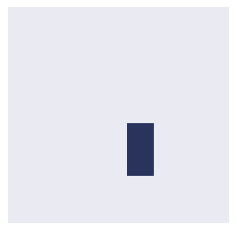

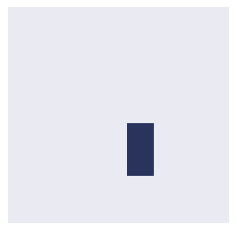

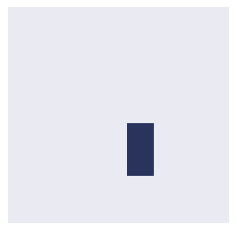

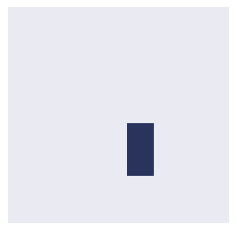

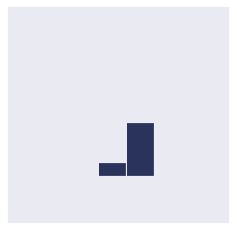

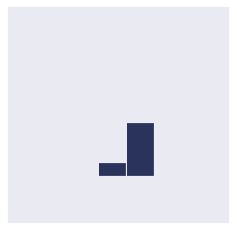

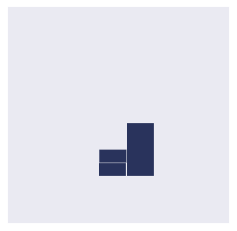

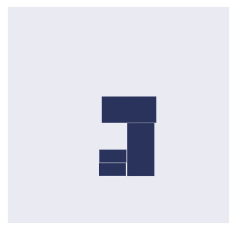

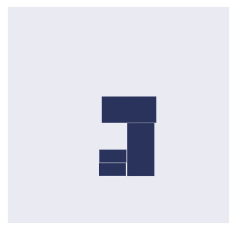

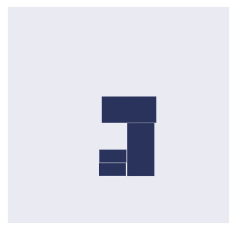

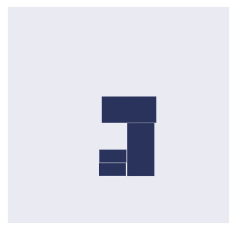

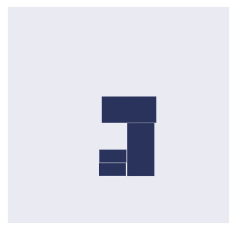

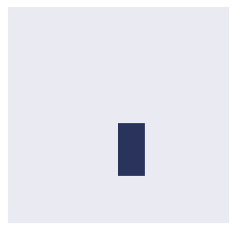

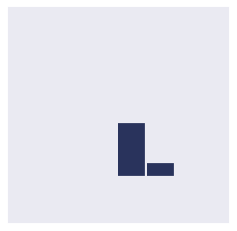

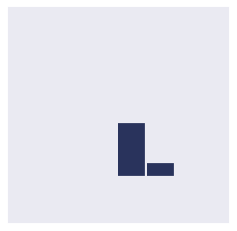

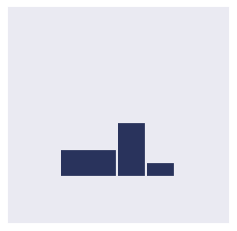

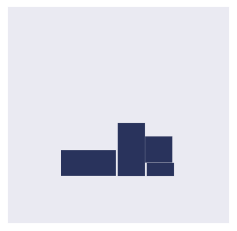

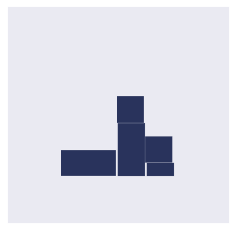

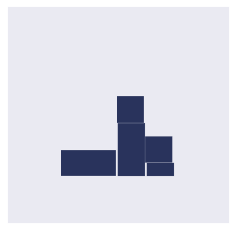

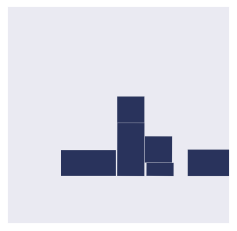

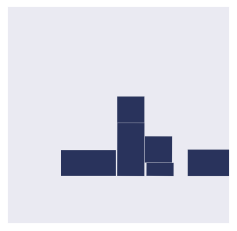

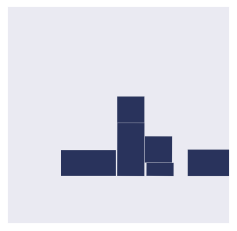

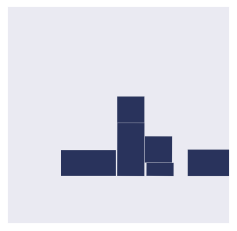

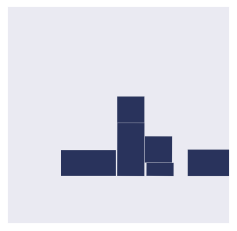

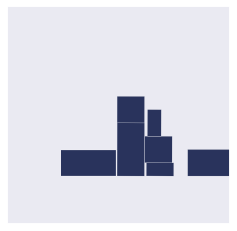

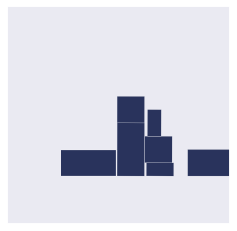

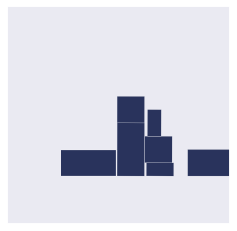

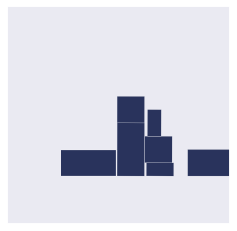

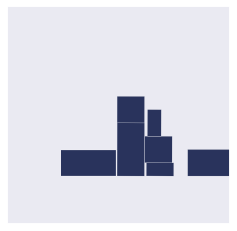

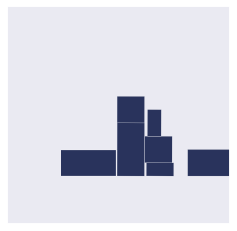

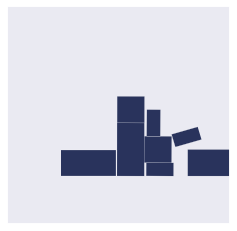

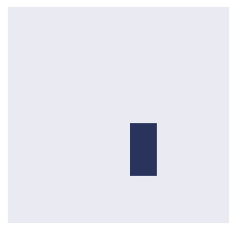

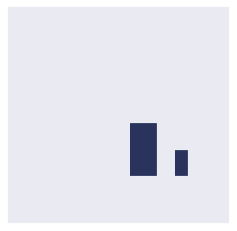

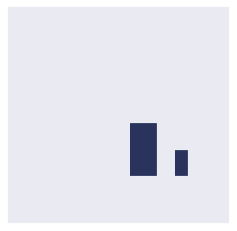

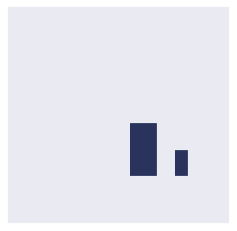

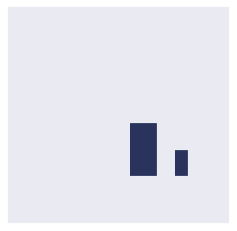

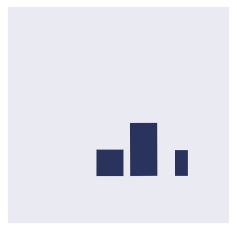

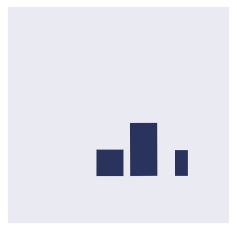

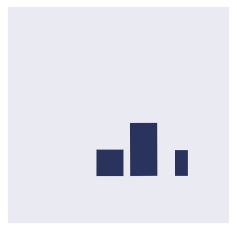

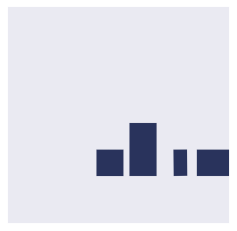

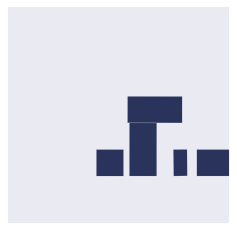

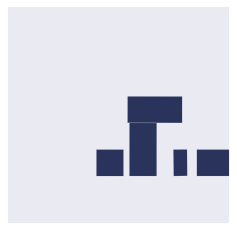

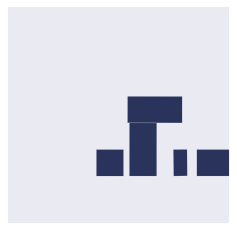

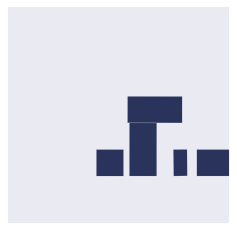

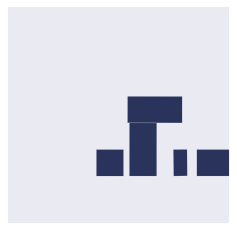

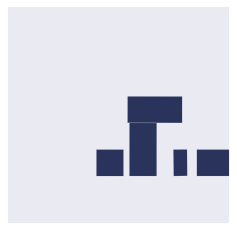

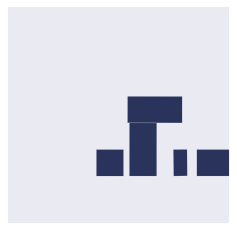

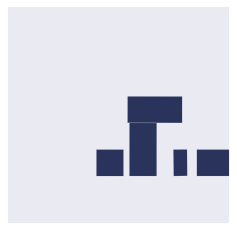

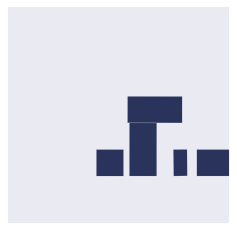

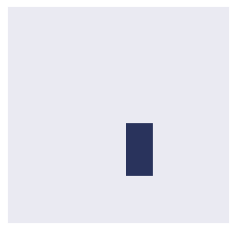

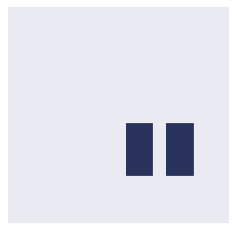

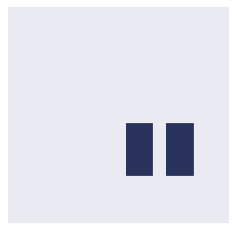

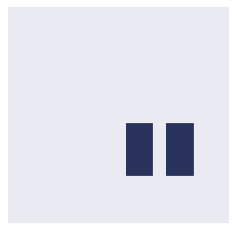

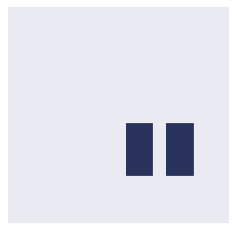

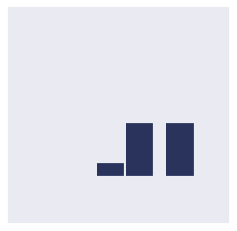

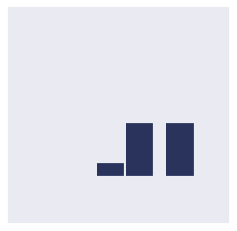

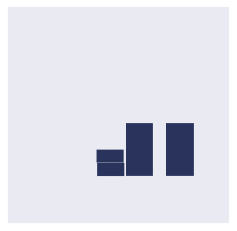

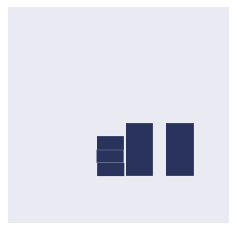

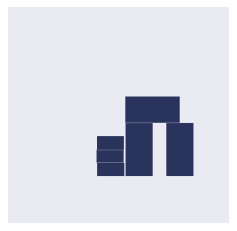

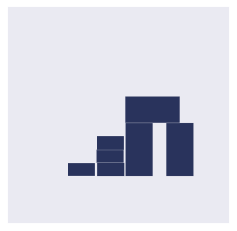

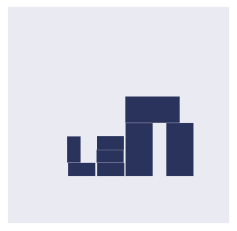

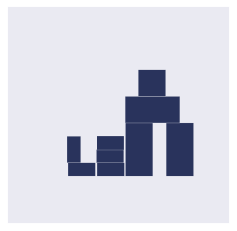

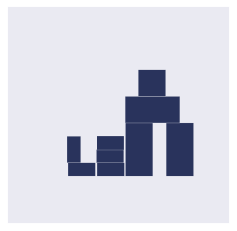

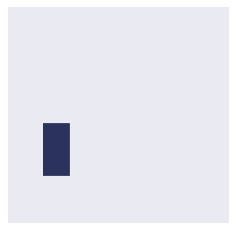

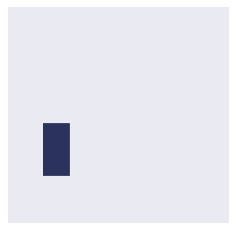

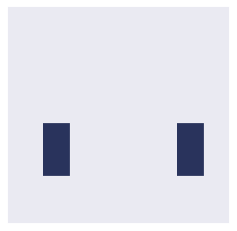

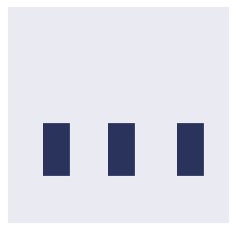

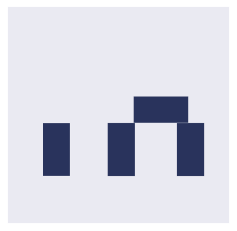

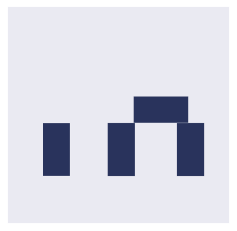

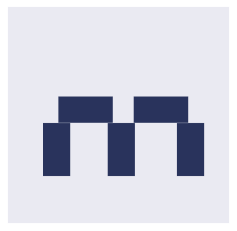

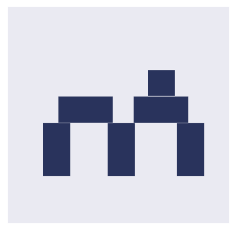

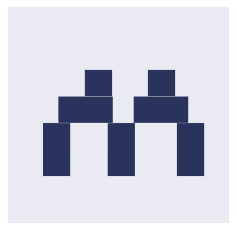

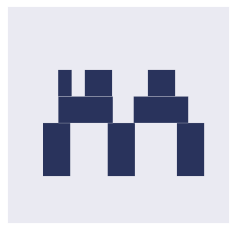

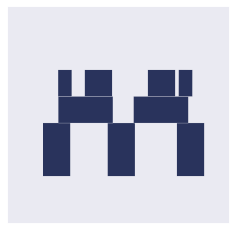

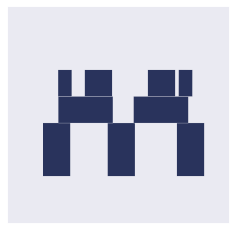

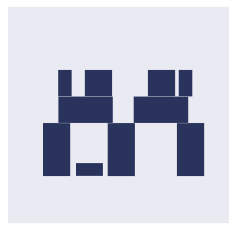

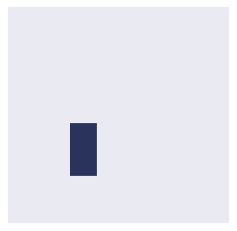

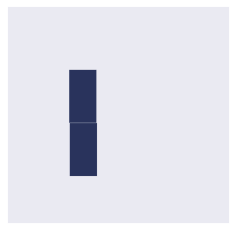

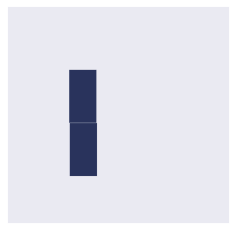

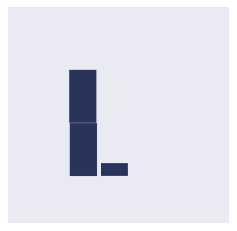

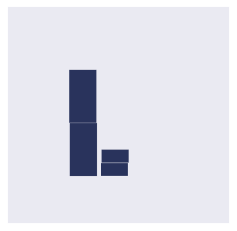

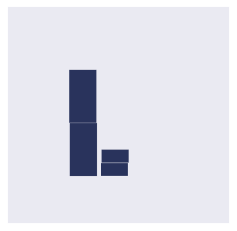

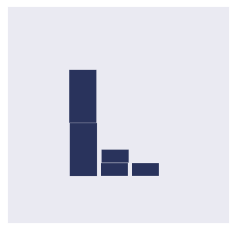

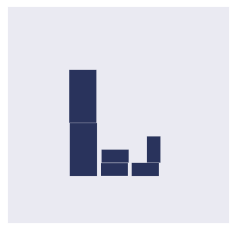

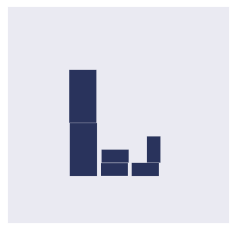

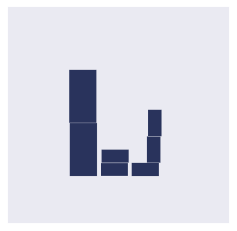

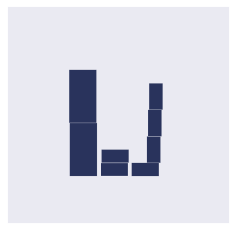

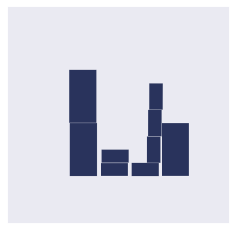

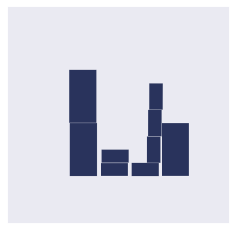

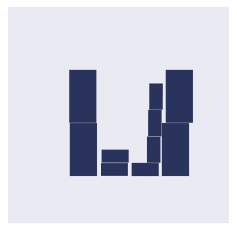

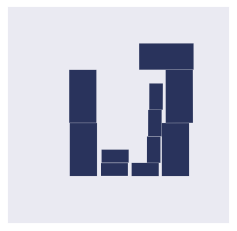

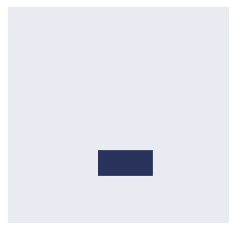

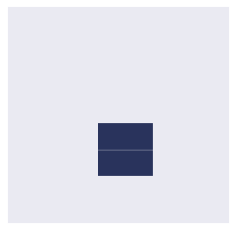

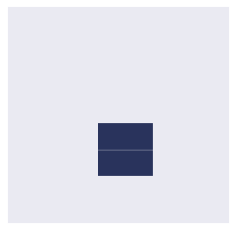

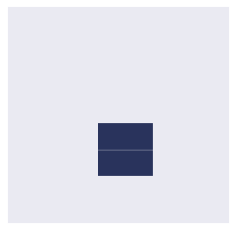

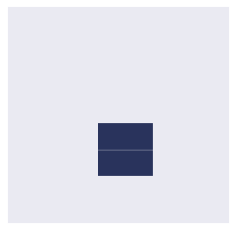

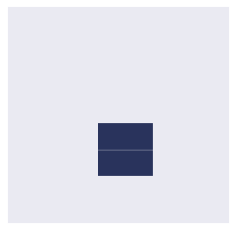

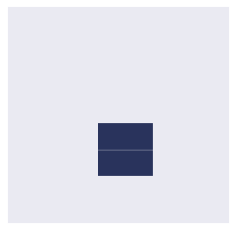

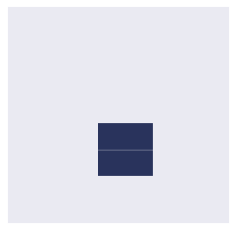

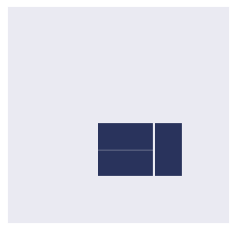

In [218]:
## get end state of trials
query = coll.find({"$and":[{'eventType':'settled', 'phase':'build', 'workerId':"A2XKVWHXJV0HWZ"}]})
df = pd.DataFrame(list(query.sort('time_absolute')))
for i in range(0,100):
    vertices = df['allVertices'][i]
    collapsed_verts = list(map(lambda block: list(map(lambda corner: (corner['x'],world_size-corner['y']), block)), vertices))
    draw_world(collapsed_verts)